In [1]:
import pandas as pd 
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(style="dark")

Bring in the wrangled data

In [2]:
train, validate, test = wrangle.wrangle_zillow()

Wrangle_zillow gives us a quick look at distibutions

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15189 entries, 10876414 to 14264405
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        15189 non-null  int64  
 1   bathrooms   15189 non-null  float64
 2   bedrooms    15189 non-null  int64  
 3   has_pool    15189 non-null  int64  
 4   tax_value   15189 non-null  int64  
 5   year_built  15189 non-null  float64
 6   tax_amount  15189 non-null  float64
 7   fips        15189 non-null  object 
 8   county      15189 non-null  object 
 9   tax_rate    15189 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [4]:
train.isnull().sum()

sqft          0
bathrooms     0
bedrooms      0
has_pool      0
tax_value     0
year_built    0
tax_amount    0
fips          0
county        0
tax_rate      0
dtype: int64

We have taken care of all null values via the wrangle_zillow dropping all null values. We replaced all null values in has_pool with 0. This lines up with about a quarter of southern california houses having a pool. 

Originially I was also looking at fireplaces and garages as well but the data wasnt there to support them 

In [5]:
train.fips.value_counts()

6037.0    9653
6059.0    4200
6111.0    1336
Name: fips, dtype: int64

In [6]:
import pandas as pd
import numpy as np
import wrangle
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


def distrubutions(train):
    '''checking distributions of our selected features/univariate exploration'''
    for x in train[['bedrooms','bathrooms','sqft','tax_value','has_pool','county', 'year_built']]:
        sns.histplot(train[x], bins = 20, kde = True)
        plt.title(f'Distribution of {x}')
        plt.tight_layout()
        plt.show()

def corr_heatmap(): 
# Make a heatmap that shows correlation of churn and other variables
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(train.drop(columns=['tax_amount',
                                              'sqft_scaled',
                                              'bathrooms_scaled',
                                              'bedrooms_scaled',
                                              'tax_rate']).corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with Tax Value', fontdict={'fontsize':18}, pad=16);


        
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    '''Takes in df and scales the columns inputed and concats them to the dataframe '''    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

def lets_explore():
    distrubutions(train)
    corr_heatmap()

def scat_plot(df,x,y):
    plt.figure(figsize = (12,10))
    sns.lmplot(x = (x), y=(y), data = train,line_kws={'color': 'red'})
    plt.title(f'Relationship between {x} and {y}', loc = 'left')
    plt.tight_layout()
    plt.show()

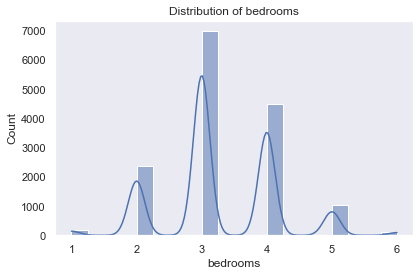

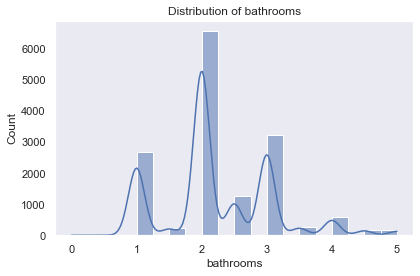

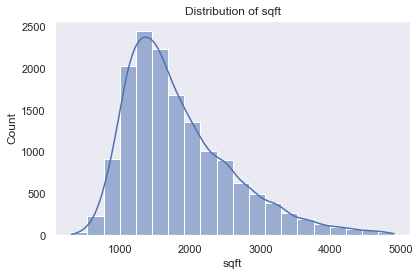

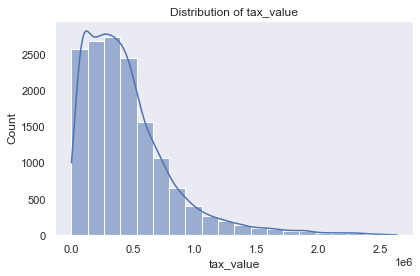

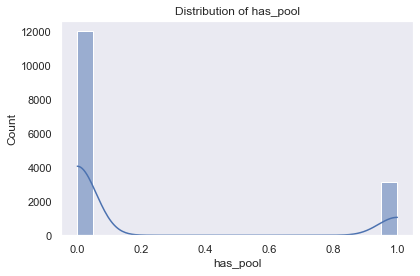

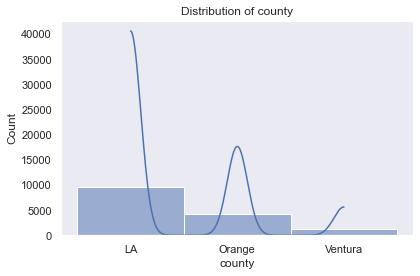

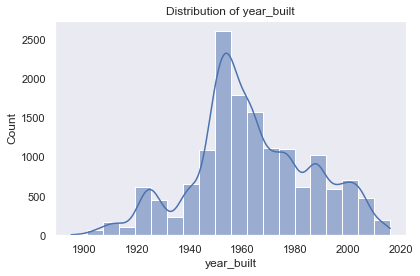

In [7]:
distrubutions(train)

In [8]:
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['sqft', 'bedrooms', 'bathrooms'],
)

In [9]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate,sqft_scaled,bedrooms_scaled,bathrooms_scaled
parcel_id,,,,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,1.24,0.161353,0.4,0.4
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,1.18,0.446324,0.6,0.4
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,1.23,0.381696,0.4,0.2
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,1.53,0.356972,0.6,0.6
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,1.60,0.247018,0.4,0.4


In [10]:
def corr_heatmap(): 
# Make a heatmap that shows correlation of churn and other variables
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(train.drop(columns=['tax_amount',
                                              'sqft_scaled',
                                              'bathrooms_scaled',
                                              'bedrooms_scaled',
                                              'tax_rate']).corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with Tax Value', fontdict={'fontsize':18}, pad=16);


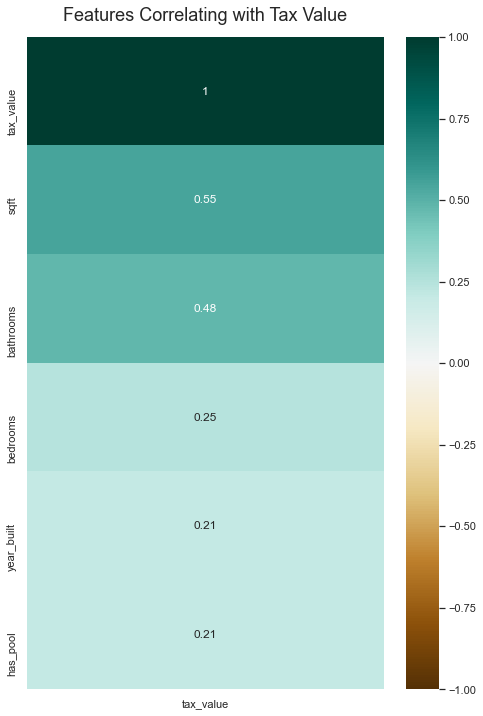

In [11]:
corr_heatmap()

The tax amount is directly tied to the tax value will have to drop it. 
Looks like everything else is a correlatiing factor to price


In [12]:
# make dictionary with fips values and county names
counties = {6037: 'LA', 6059: 'Orange', 6111: 'Ventura'}

# use .replace to create an new column called county
train['county'] = train.fips.replace(counties)

In [13]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate,sqft_scaled,bedrooms_scaled,bathrooms_scaled
parcel_id,,,,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,1.24,0.161353,0.4,0.4
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,1.18,0.446324,0.6,0.4
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,1.23,0.381696,0.4,0.2
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,1.53,0.356972,0.6,0.6
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,1.60,0.247018,0.4,0.4


In [14]:
train['tax_rate'] = train.tax_amount / train.tax_value

In [15]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate,sqft_scaled,bedrooms_scaled,bathrooms_scaled
parcel_id,,,,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,0.012414,0.161353,0.4,0.4
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,0.011781,0.446324,0.6,0.4
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,0.012308,0.381696,0.4,0.2
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,0.015350,0.356972,0.6,0.6
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,0.016033,0.247018,0.4,0.4


In [16]:
encoded_counties={6037: 0, 6059: 1, 6111: 2}
train['encoded_county']=train.fips.replace(encoded_counties)

In [17]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate,sqft_scaled,bedrooms_scaled,bathrooms_scaled,encoded_county
parcel_id,,,,,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,0.012414,0.161353,0.4,0.4,0
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,0.011781,0.446324,0.6,0.4,0
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,0.012308,0.381696,0.4,0.2,0
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,0.015350,0.356972,0.6,0.6,0
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,0.016033,0.247018,0.4,0.4,1


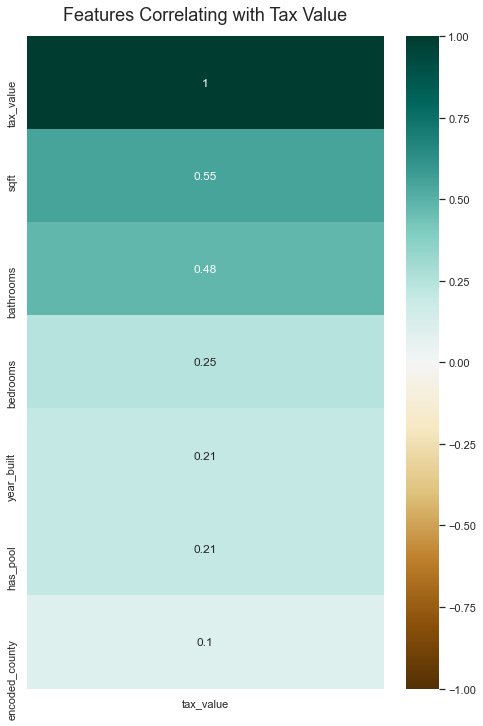

In [18]:
corr_heatmap()

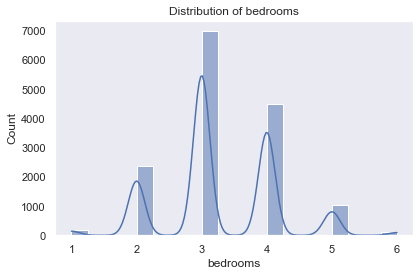

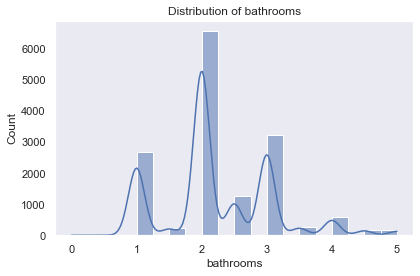

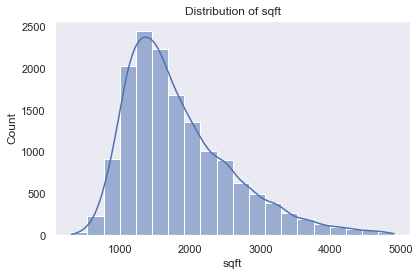

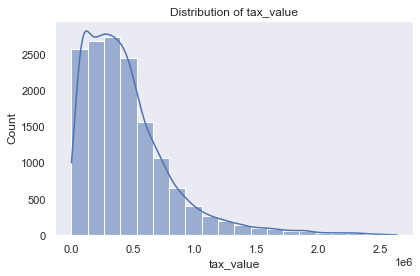

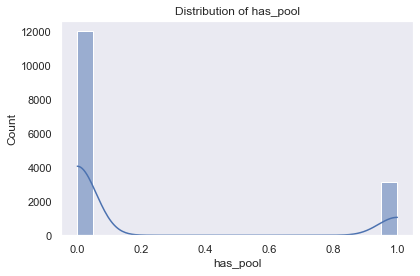

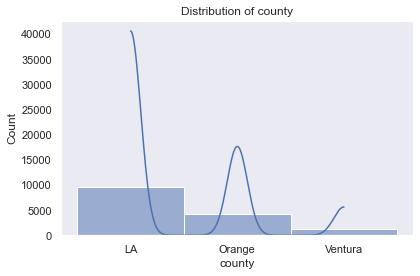

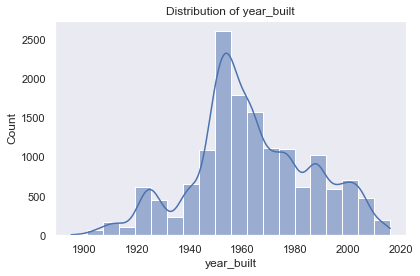

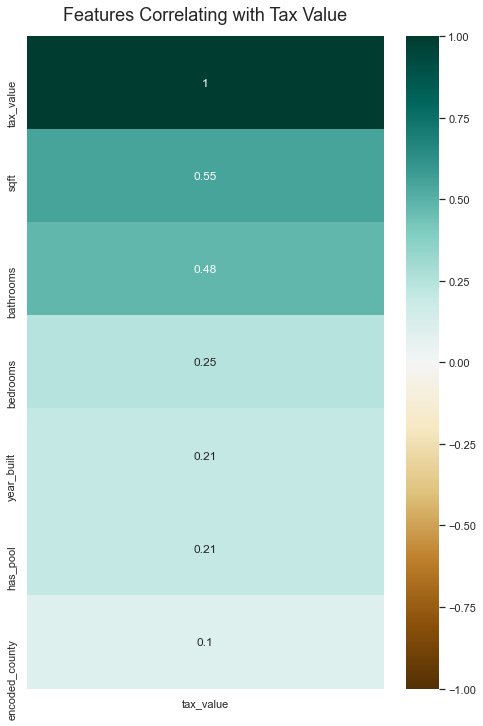

In [19]:
lets_explore()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.55


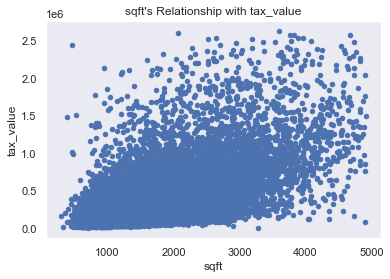

In [20]:
correlation_exploration(train, 'sqft', 'tax_value')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.48


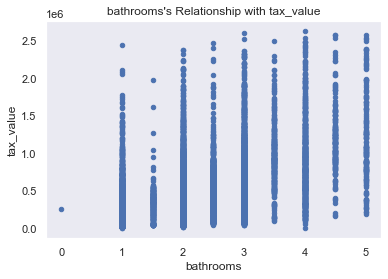

In [21]:
correlation_exploration(train, 'bathrooms', 'tax_value')

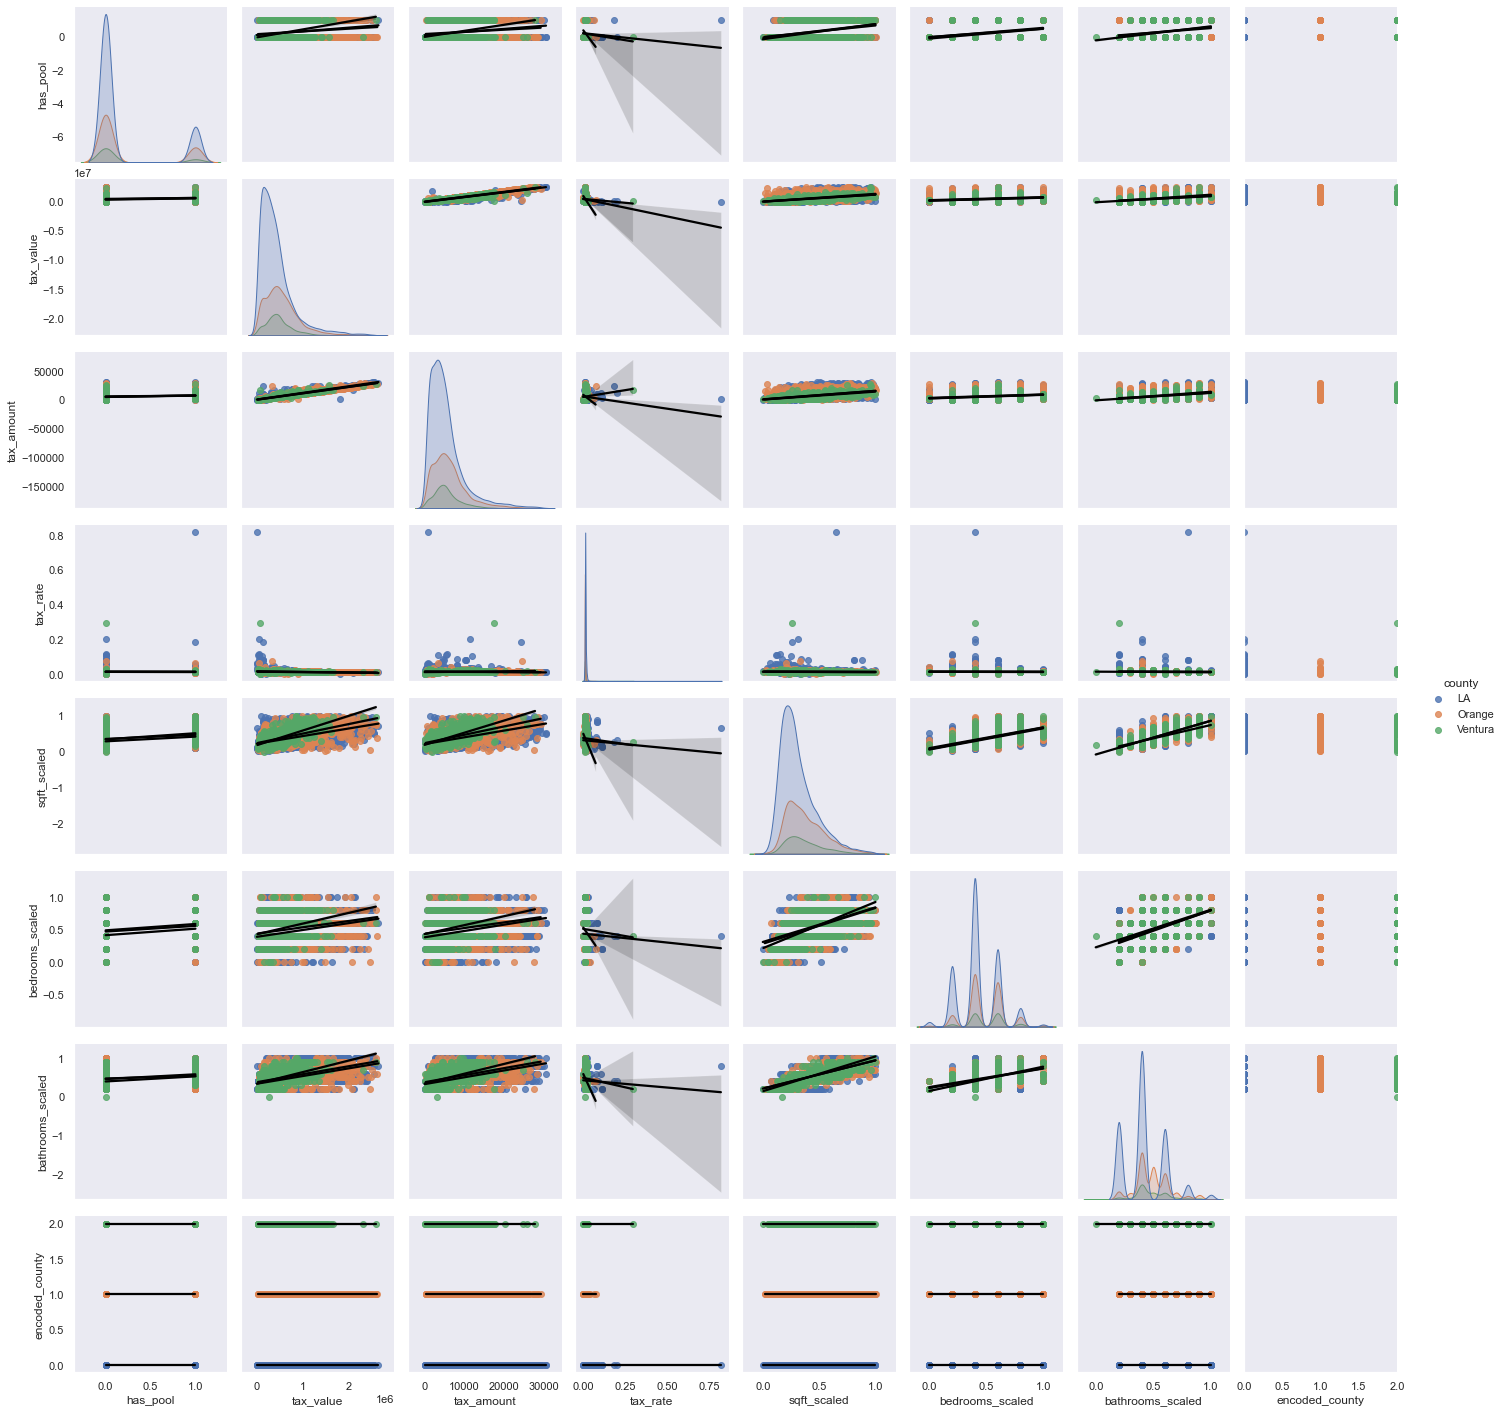

In [22]:
plot_variable_pairs(train.drop(columns=['year_built','fips','bedrooms', 'bathrooms','sqft']), 'county')

In [23]:
train.head()

,sqft,bathrooms,bedrooms,has_pool,tax_value,year_built,tax_amount,fips,county,tax_rate,sqft_scaled,bedrooms_scaled,bathrooms_scaled,encoded_county
parcel_id,,,,,,,,,,,,,,
10876414,1044,2.0,3,0,394222,1954.0,4894.00,6037.0,LA,0.012414,0.161353,0.4,0.4,0
12528247,2358,2.0,4,0,1326298,1929.0,15625.69,6037.0,LA,0.011781,0.446324,0.6,0.4,0
11740891,2060,1.0,3,0,378901,1924.0,4663.60,6037.0,LA,0.012308,0.381696,0.4,0.2,0
11211538,1946,3.0,4,1,254400,1990.0,3904.99,6037.0,LA,0.015350,0.356972,0.6,0.6,0
14076657,1439,2.0,3,0,63641,1971.0,1020.36,6059.0,Orange,0.016033,0.247018,0.4,0.4,1


In [24]:
r, p = stats.pearsonr(train[x_string], train[y_string])
print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
print(f'r = {round(r, 2)}')
plt.show()

NameError: name 'x_string' is not defined

In [40]:
def scat_plot(df,x,y):
    plt.figure(figsize = (12,10))
    sns.lmplot(x = (x), y=(y), data = train,line_kws={'color': 'red'})
    plt.title(f'Relationship between {x} and {y}', loc = 'left')
    plt.tight_layout()
    plt.show()

<Figure size 864x720 with 0 Axes>

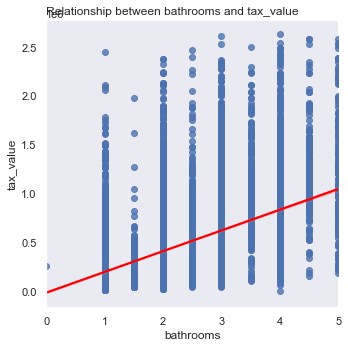

In [41]:
scat_plot(train,'bathrooms', 'tax_value')